### Titanic dataset kaggle competition using random forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [242]:
train_data = pd.read_csv("train.csv")

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [243]:
train_data.isnull().count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

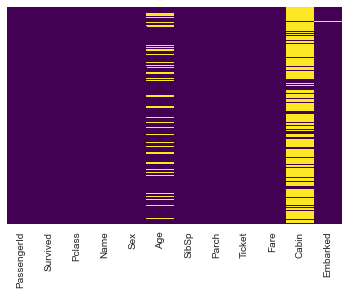

In [244]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

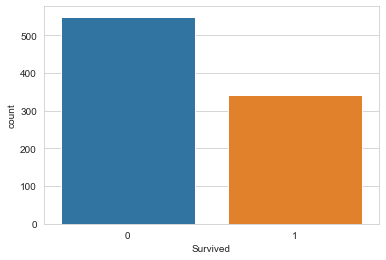

In [245]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_data)

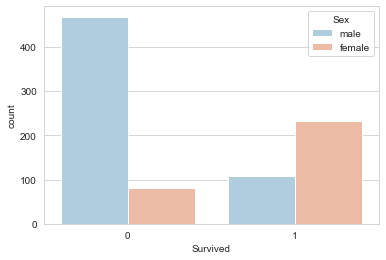

In [246]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_data,palette='RdBu_r')

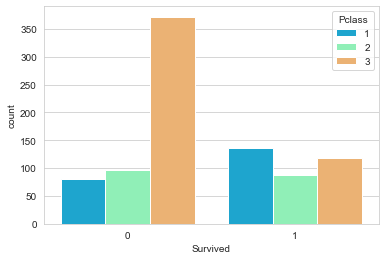

In [247]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_data,palette='rainbow')

In [248]:
meanage = train_data["Age"].mean()
train_data["Age"] = train_data["Age"].fillna(meanage)

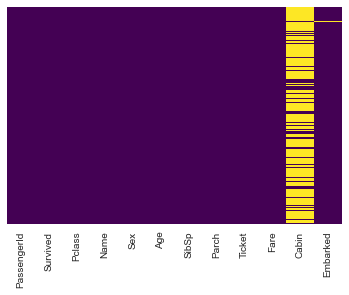

In [249]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [250]:
#train_data.drop("Cabin",axis=1,inplace=True)
train_data['Embarked']=train_data['Embarked'].fillna("S")

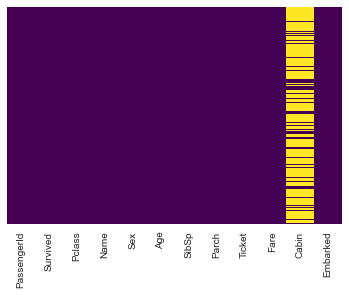

In [251]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


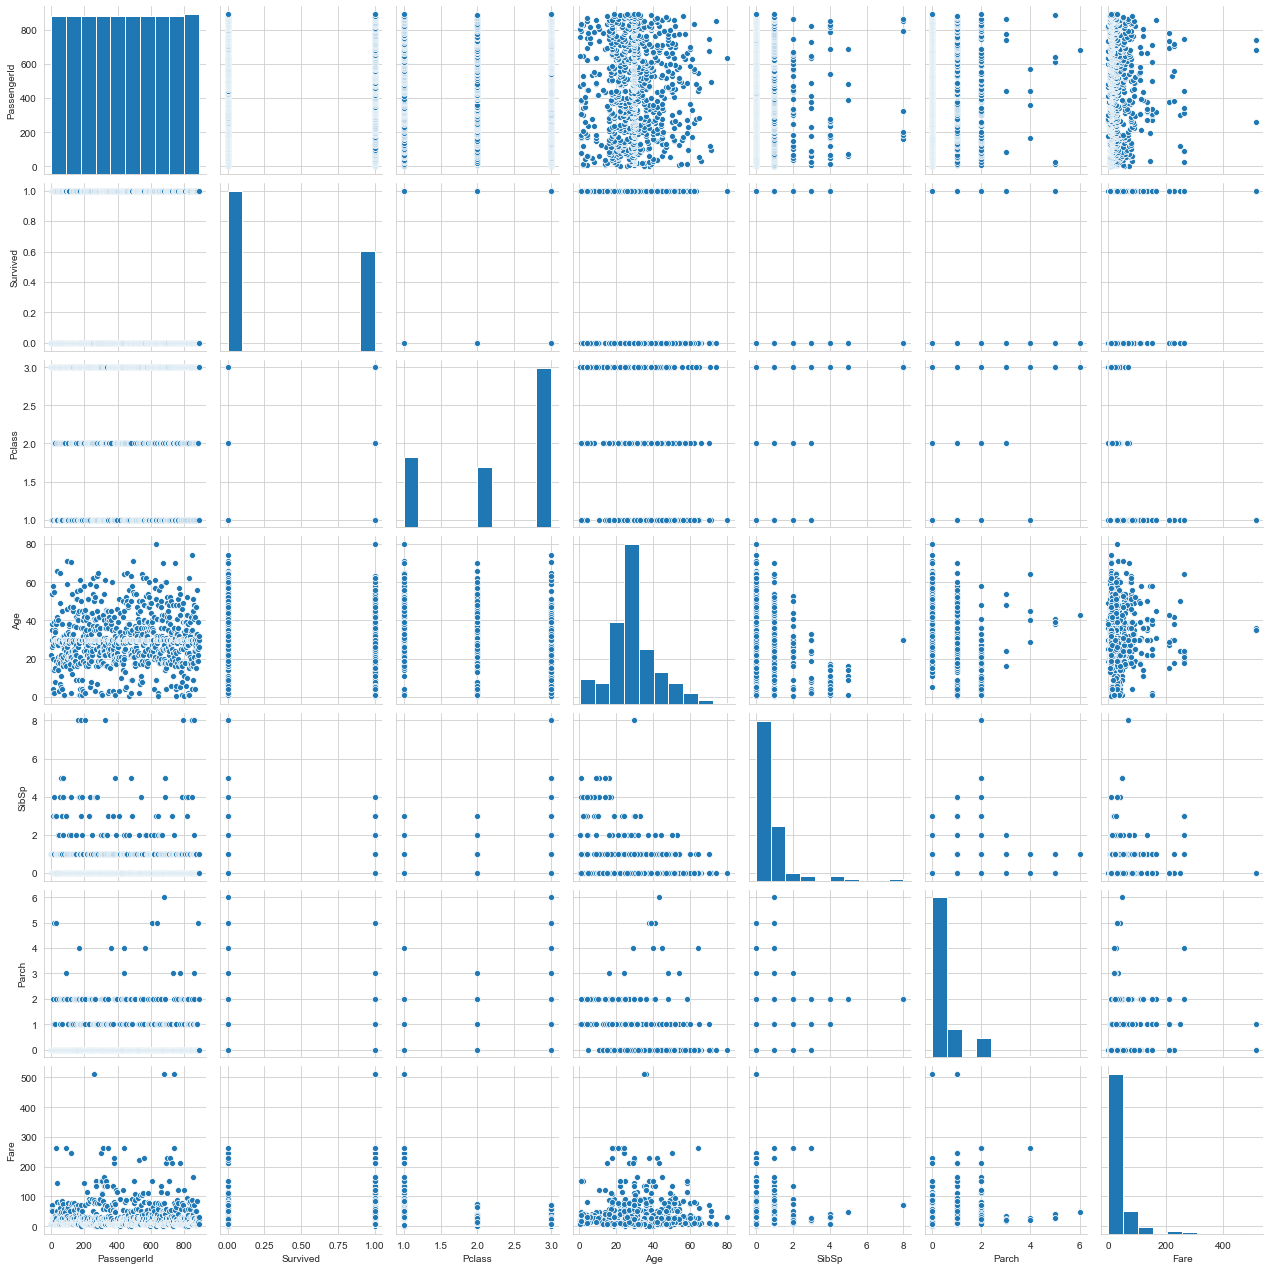

In [252]:
sns.pairplot(train_data)
train_data.head()

In [253]:

sex = pd.get_dummies(train_data['Sex'],drop_first=True)
embark = pd.get_dummies(train_data['Embarked'],drop_first=True)

train_data.drop(['Cabin','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
train_data = pd.concat([train_data,sex,embark],axis=1)


In [254]:
train_data.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [255]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Survived',axis=1), 
                                                    train_data['Survived'], test_size=0.30, 
                                                    random_state=101)



In [256]:
X_train.head()




,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
520,521,1,30.0,0,0,93.5000,0,0,1
510,511,3,29.0,0,0,7.7500,1,1,0
446,447,2,13.0,0,1,19.5000,0,0,1
2,3,3,26.0,0,0,7.9250,0,0,1
691,692,3,4.0,0,1,13.4167,0,0,0


In [257]:
y_test.head()

331    0
700    1
748    0
751    1
481    0
Name: Survived, dtype: int64

In [258]:
y_train.head()

520    1
510    1
446    1
2      1
691    1
Name: Survived, dtype: int64

In [259]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,332,1,45.500000,0,0,28.500,1,0,1
700,701,1,18.000000,1,0,227.525,0,0,0
748,749,1,19.000000,1,0,53.100,1,0,1
751,752,3,6.000000,0,1,12.475,1,0,1
481,482,2,29.699118,0,0,0.000,1,0,1


In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score

rf = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
precision, recall, fscore, support = score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(precision,recall,(y_pred==y_test).sum()/len(y_pred)))


Precision: [0.81920904 0.9010989 ] / Recall: [0.94155844 0.71929825] / Accuracy: 0.8470149253731343


In [283]:
test_data=pd.read_csv('test.csv')

sex = pd.get_dummies(test_data['Sex'],drop_first=True)
embark = pd.get_dummies(test_data['Embarked'],drop_first=True)
test_data.drop(['Cabin','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test_data = pd.concat([test_data,sex,embark],axis=1)



meanage_test = test_data["Age"].mean()
test_data["Age"] = test_data["Age"].fillna(meanage_test)

meanfare=test_data["Fare"].mean()
test_data["Fare"] = test_data["Fare"].fillna(meanfare)




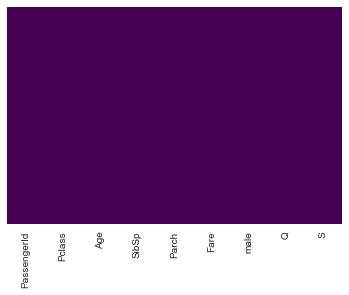

In [284]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [285]:
test_data.head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [286]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)
y_data = rf.predict(test_data)

In [295]:
list1 = test_data['PassengerId'].tolist()
list2 = y_data.tolist()
list2

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,


In [ ]:
test_data.head()

In [296]:

list_of_tuples = list(zip(list1,list2)) 
df = pd.DataFrame (list_of_tuples, columns = ['PassengerId','Survived'])


In [297]:
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [299]:
df.to_csv('submission1.csv',index=False)